In [2]:
%pylab notebook
#lib for widgets
import ipywidgets as widg
#importing our lib for binning and fitting
from gymness import binning
from scipy import stats #need for chi2 statistics
from IPython.display import Latex

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Global variables
df           = None
R            = 502. #circuit resistance 
capacity_1   = 1.14739401756e-09
capacity_2   = 1.3277203496e-09
e_charge     = -1.60217653*10**(-19)

### Offset check at x=0

We want to check the offset between the two probes' signals at x=0. This could be the source of the offset of currents.
We use the dataset = "data_raw_area_calibration" with all the test at the point x=0 at different powers.

In [4]:
file_path1 = 'data/data_raw_area_calibration/160509002.txt' 
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df1,0.0002)
binning.amplify_data(df1,[('v_scheda',7.41),('v_res',-2)])
binning.calculate_data(df1, R ,1) #compute the current and v_probe

file_path2 = 'data/data_raw_area_calibration/160509009.txt' 
df2 = binning.read_data(file_path2, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.remove_offset(df2,0.0002)
binning.amplify_data(df2,[('v_scheda',7.41),('v_res',2)])
binning.calculate_data(df2, R ,1) #compute the current and v_probe

print('Loaded dataframe')

TypeError: calculate_data() takes 2 positional arguments but 3 were given

In [1]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(df1.t, df1.v_res_ampl,'b')
ax1.plot(df1.t, df1.v_scheda_ampl, 'g')
ax1.plot(df1.t, df2.v_res_ampl,'r')

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


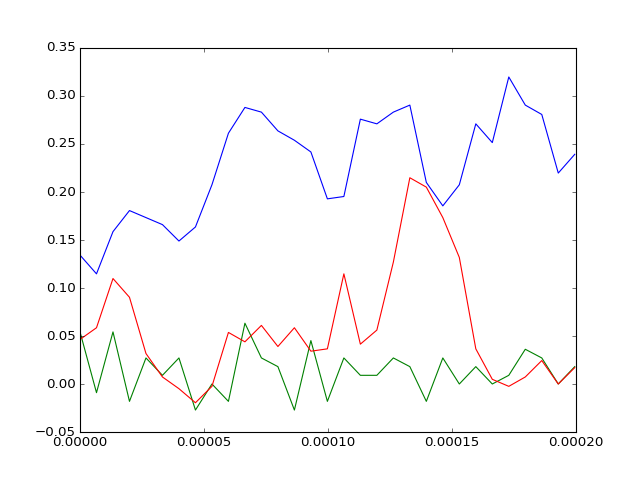

Offset  mean v_scheda 0.01342222152217742
Offset  mean v_res1: 0.22657825100806453
Offset  mean v_res2: 0.05796370967741935
Offset between the two signals: -0.16861454133064518
N. points: 31


In [5]:
df1 = df1[df1.t < 0.0002]
df2 = df2[df2.t < 0.0002]
fig1, ax1 = plt.subplots(1,1)
ax1.plot(df1.t, df1.v_res_ampl,'b')
ax1.plot(df1.t, df1.v_scheda_ampl, 'g')
ax1.plot(df1.t, df2.v_res_ampl,'r')

print("Offset  mean v_scheda {}".format(df1.v_scheda_ampl.mean()))
print("Offset  mean v_res1: {}".format(df1.v_res_ampl.mean()))
print("Offset  mean v_res2: {}".format(df2.v_res_ampl.mean()))
print("Offset between the two signals: {}".format(df2.v_res_ampl.mean() - df1.v_res_ampl.mean()))
print("N. points: {}".format(len(df1.v_res_ampl)))

### Single dataset check
Now we want to check the offset between the two probes in every dataset at different x points. We use the dataset = "data_raw-0605" that contains the first spatial scan of the probes.


In [7]:
file_path3 = 'data/data_raw-0605/160506027.txt' 
df3 = binning.read_data(file_path3, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df3,[('v_scheda',7.41),('v_res',-2)])
binning.calculate_data(df3, R ,1) #compute the current and v_probe

df4 = binning.read_data(file_path3, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns
binning.amplify_data(df4,[('v_scheda',7.41),('v_res',2)])
binning.calculate_data(df4, R ,1) #compute the current and v_probe

print('Loaded dataframe')

Loaded dataframe


<IPython.core.display.Javascript object>


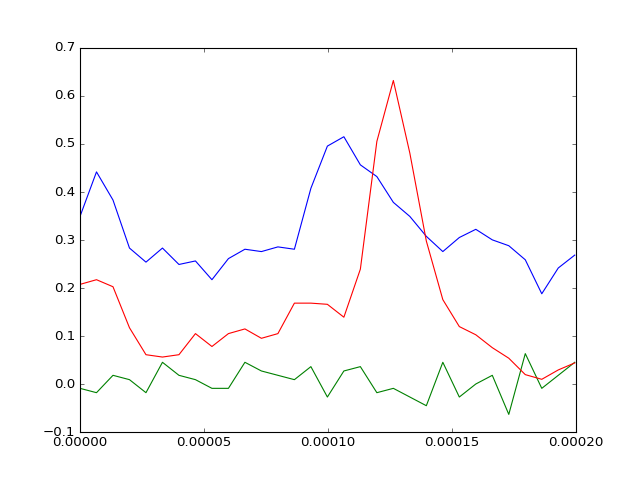

Offset  mean probe1: 0.31911542338709675
Offset  mean probe2: 0.15979397681451613
Offset between the two signals: -0.15932144657258063
N. points: 31


In [8]:
df3 = df3[df3.t < 0.0002]
df4 = df4[df4.t < 0.0002]
fig, ax = plt.subplots(1,1)
ax.plot(df3.t, df3.v_res_ampl,'b')
ax.plot(df3.t, df3.v_scheda_ampl, 'g')
ax.plot(df3.t, df4.v_res_ampl,'r')

print("Offset  mean probe1: {}".format(df3.v_res_ampl.mean()))
print("Offset  mean probe2: {}".format(df4.v_res_ampl.mean()))
print("Offset between the two signals: {}".format(df4.v_res_ampl.mean() - df3.v_res_ampl.mean()))
print("N. points: {}".format(len(df4.v_res_ampl)))